## Breast cancer cell classification using Weighted K-Nearest Neighbor classifier. Use the dataset of file wisc_bc_data.csv and following settings to design the classifier:
-	Min-max feature normalization.
-	Randomly select 100 healthy and 100 cancerous cell samples to construct the training dataset. Use rest of the samples to estimate the accuracy of the classifier.
-	Calculate the accuracies for K = 9, 11, 13, 15, 17 and 19

In [1]:
import pandas as pd
df = pd.read_csv('wisc_bc_data.csv')

In [2]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Dictionary
- radius_mean                569 non-null float64
- texture_mean               569 non-null float64
- perimeter_mean             569 non-null float64
- area_mean                  569 non-null float64
- smoothness_mean            569 non-null float64
- compactness_mean           569 non-null float64
- concavity_mean             569 non-null float64
- concave points_mean        569 non-null float64
- symmetry_mean              569 non-null float64
- fractal_dimension_mean     569 non-null float64
- radius_se                  569 non-null float64
- texture_se                 569 non-null float64
- perimeter_se               569 non-null float64
- area_se                    569 non-null float64
- smoothness_se              569 non-null float64
- compactness_se             569 non-null float64
- concavity_se               569 non-null float64
- concave points_se          569 non-null float64
- symmetry_se                569 non-null float64
- fractal_dimension_se       569 non-null float64
- radius_worst               569 non-null float64
- texture_worst              569 non-null float64
- perimeter_worst            569 non-null float64
- area_worst                 569 non-null float64
- smoothness_worst           569 non-null float64
- compactness_worst          569 non-null float64
- concavity_worst            569 non-null float64
- concave points_worst       569 non-null float64
- symmetry_worst             569 non-null float64
- fractal_dimension_worst    569 non-null float64

In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.isnull().sum()
df = df.drop('id', axis = True)

In [6]:
def diagnosis_mapping(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(diagnosis_mapping) 

In [7]:
#import numpy as np  
#X = np.array(df.iloc[:, 1:]) 
#y = np.array(df['diagnosis']) 

In [8]:
df_M = df[df['diagnosis'] == 1]
df_B = df[df['diagnosis'] == 0]

In [9]:
df_M_train = df_M.sample(n=100)
df_M_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
274,1,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,...,20.92,34.69,135.1,1320.0,0.1315,0.1806,0.2080,0.1136,0.2504,0.07948
239,1,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,...,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496
237,1,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,...,24.22,26.17,161.7,1750.0,0.1228,0.2311,0.3158,0.1445,0.2238,0.07127
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
194,1,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.08,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,...,16.86,34.85,115.0,811.3,0.1559,0.4059,0.3744,0.1772,0.4724,0.10260
372,1,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.1,1535.0,0.1192,0.2840,0.4024,0.1966,0.2730,0.08666
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
451,1,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,...,21.44,30.96,139.8,1421.0,0.1528,0.1845,0.3977,0.1466,0.2293,0.06091


In [10]:
df_B_train = df_B.sample(n=100)
df_B_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
113,0,10.510,20.19,68.64,334.2,0.11220,0.13030,0.064760,0.030680,0.1922,...,11.16,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026
524,0,9.847,15.68,63.00,293.2,0.09492,0.08419,0.023300,0.024160,0.1387,...,11.24,22.99,74.32,376.5,0.14190,0.22430,0.08434,0.06528,0.2502,0.09209
378,0,13.660,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.024710,0.1792,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638
345,0,10.260,14.71,66.20,321.6,0.09882,0.09159,0.035810,0.020370,0.1633,...,10.88,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488
418,0,12.700,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,...,13.65,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,11.310,19.04,71.80,394.1,0.08139,0.04701,0.037090,0.022300,0.1516,...,12.33,23.84,78.00,466.7,0.12900,0.09148,0.14440,0.06961,0.2400,0.06641
523,0,13.710,18.68,88.73,571.0,0.09916,0.10700,0.053850,0.037830,0.1714,...,15.11,25.63,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,0.09031
458,0,13.000,25.13,82.61,520.2,0.08369,0.05073,0.012060,0.017620,0.1667,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
144,0,10.750,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,...,11.95,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769


In [11]:
#df_train = df_M_train.merge(df_B_train, left_index=True, right_index=True, how = 'outer')
df_train = pd.concat([df_B_train, df_M_train], ignore_index=True)
df_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,10.510,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,...,11.16,22.75,72.62,374.4,0.1300,0.2049,0.12950,0.06136,0.2383,0.09026
1,0,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,...,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209
2,0,13.660,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.25690,0.10540,0.3387,0.09638
3,0,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
4,0,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,...,13.65,16.92,88.12,566.9,0.1314,0.1607,0.09385,0.08224,0.2775,0.09464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,14.190,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,...,16.86,34.85,115.00,811.3,0.1559,0.4059,0.37440,0.17720,0.4724,0.10260
196,1,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
197,1,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.32150,0.16280,0.2572,0.06637
198,1,19.590,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,...,21.44,30.96,139.80,1421.0,0.1528,0.1845,0.39770,0.14660,0.2293,0.06091


In [12]:
#df_test = pd.merge(df, df_train, on=['radius_mean','texture_mean', 'perimeter_mean', 'area_mean'], how='left', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
df_test = pd.concat([df, df_train])
df_test.drop_duplicates(keep=False)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [13]:
import numpy as np  
X_train = np.array(df_train.iloc[:, 1:]) 
y_train = np.array(df_train['diagnosis'])

In [14]:
import numpy as np  
X_test = np.array(df_test.iloc[:, 1:]) 
y_test = np.array(df_test['diagnosis']) 

In [15]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [16]:
scores = {}
scores_list = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
list_K = [9,11,13,15,17,19]
for k in list_K:  
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance') 
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

{9: 0.9674902470741222,
 11: 0.9609882964889467,
 13: 0.9570871261378413,
 15: 0.953185955786736,
 17: 0.953185955786736,
 19: 0.953185955786736}

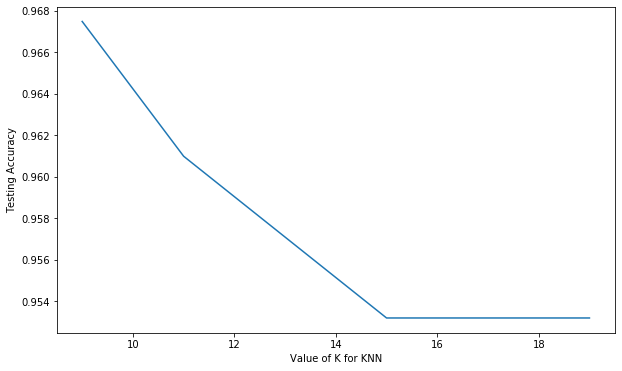

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 6)) 
plt.plot(list_K,scores_list) 
plt.xlabel('Value of K for KNN') 
plt.ylabel('Testing Accuracy') 
plt.show() 